In [1]:
import pyarma as pa
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline.backend_inline import set_matplotlib_formats
from matplotlib import cm

set_matplotlib_formats('svg')
plt.rc('legend', frameon=False)
plt.rc('figure', figsize = (7, 5))

In [37]:
val_10 = pa.mat()
val_10.load("val_10.bin")
val_10 = np.array(val_10).flatten()

vec_10 = pa.mat()
vec_10.load("vec_10.bin")
vec_10 = np.array(vec_10)

vec_ana_10 = pa.mat()
vec_ana_10.load("vec_ana_10.bin")
vec_ana_10 = np.array(vec_ana_10)

#for i in range(len(vec_10)):
#    print(vec_10[i, 0])
#    print(vec_ana_10[i, 0])
#    print(" ")

#add endpoints
vec_10 = np.concatenate((np.zeros((1, len(vec_10))), vec_10, np.zeros((1, len(vec_10)))), axis = 0)
vec_ana_10 = np.concatenate((np.zeros((1, len(vec_ana_10))), vec_ana_10, np.zeros((1, len(vec_ana_10)))), axis = 0)

In [35]:
val_100 = pa.mat()
val_100.load("val_100.bin")
val_100 = np.array(val_100).flatten()

vec_100 = pa.mat()
vec_100.load("vec_100.bin")
vec_100 = np.array(vec_100)


vec_ana_100 = pa.mat()
vec_ana_100.load("vec_ana_100.bin")
vec_ana_100 = np.array(vec_ana_100)

vec_100 = np.concatenate((np.zeros((1, len(vec_100))), vec_100, np.zeros((1, len(vec_100)))), axis = 0)
vec_ana_100 = np.concatenate((np.zeros((1, len(vec_ana_100))), vec_ana_100, np.zeros((1, len(vec_ana_100)))), axis = 0)

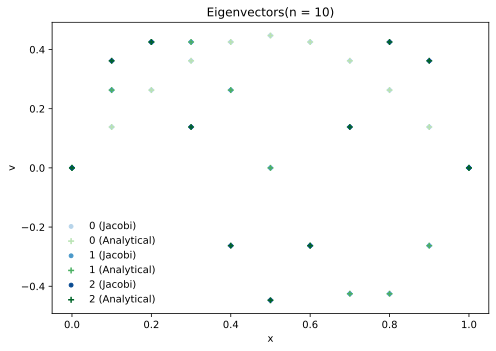

In [40]:
x_10 = np.linspace(0, 1, len(vec_10))

#plot the 3 eigenvectors corresponding to the 3 lowest eigenvalues
fig, ax = plt.subplots()
jacobi_colors = cm.Blues(np.linspace(0.3, 0.9, 3))
analytical_colors = cm.Greens(np.linspace(0.3, 0.9, 3))
for i in range(3):
    if np.sign(vec_10[1, i]) != np.sign(vec_ana_10[1, i]):
        ax.scatter(x_10, -vec_10[:, i], 15, label = "%s (Jacobi)"%i, color = jacobi_colors[i])
    else:
        ax.scatter(x_10, vec_10[:, i], 15, label = "%s (Jacobi)"%i, color = jacobi_colors[i])
    ax.scatter(x_10, vec_ana_10[:, i], marker = "+", label = "%s (Analytical)"%i, color = analytical_colors[i])
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("v")
ax.set_title("Eigenvectors(n = 10)")
plt.savefig("eigenvectors10.pdf")
plt.tight_layout()

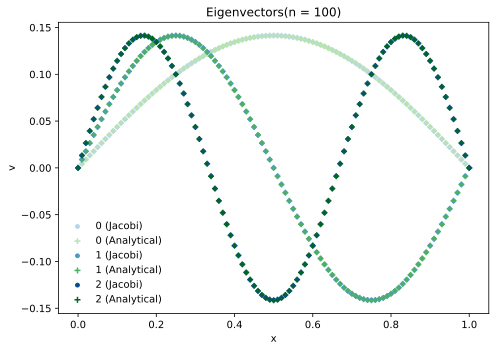

In [41]:
x_100 = np.linspace(0, 1, len(vec_100))

fig, ax = plt.subplots()
for i in range(3):
    if np.sign(vec_100[1, i]) != np.sign(vec_ana_100[1, i]):
        ax.scatter(x_100, -vec_100[:, i], 15, label = "%s (Jacobi)"%i, color = jacobi_colors[i])
    else:
        ax.scatter(x_100, vec_100[:, i], 15, label = "%s (Jacobi)"%i, color = jacobi_colors[i])
    ax.scatter(x_100, vec_ana_100[:, i], marker = "+", label = "%s (Analytical)"%i, color = analytical_colors[i])
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("v")
ax.set_title("Eigenvectors(n = 100)")
plt.savefig("eigenvectors100.pdf")
plt.tight_layout()